# Linear Regression

This notebook provides an example of how to use SML to read ain a dataset, split the data into training and testing data, replace troublesome values such as 'NaNs' from the dataset, perform classifcation on the dataset, and Lastly, generates lattice plots, other visual metrics. For this use-case we use publicly availiable dataset [Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) and use logistic regression to classify the MPG.

## SML Query

### Imports
We import the nescessary library to use SML.

In [2]:
from sml import execute

In [5]:
query = 'READ "../data/auto-mpg.csv" (separator = "\s+", header = None) AND\
 REPLACE ("?", "mode") AND SPLIT (train = .8, test = .2, validation = .0) AND\
  REGRESS (predictors = [2,3,4,5,6,7,8], label = 1, algorithm = simple)'

execute(query, verbose=False)

## Manually

The subsequent cells below show how the same actions of a SML query can be performed manually.

### Imports
Here we import the necessary libraries needed to perform the same actions as the SML query above.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import learning_curve, validation_curve

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=(12,12)
sns.set()

### Read

By default the Auto MPG data does not include it's headers, so we specify it manually, and read that file into a pandas dataframe.

In [9]:
#Names of all of the columns
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]

#Import dataset
data = pd.read_csv('../data/auto-mpg.csv', sep = '\s+', header = None, names = names)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### REPLACE
Next we drop convert all '?' symbols to NaNs and drop all rows that have a NaN in it.

In [10]:
# Remove NaNs
data_clean=data.applymap(lambda x: np.nan if x == '?' else x).dropna()

### SPLIT
We then seperate our labels from our features and use a sklearn function to perform a 80%/20% split our training and testing dataset respectively.

In [11]:
# Sep Predictiors From Labels
X = data_clean[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', "origin"]]

#Select target column
y = data_clean['mpg']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


### REGRESS

We fit our Linear regression model with our training dataset and make predictions on our testing dataset and display the accuracy. We also generate the learning and validation curves of our model here.

In [25]:
# Define and train  linear regression model
estimator = linear_model.LinearRegression()

# Generate Learning Cures
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train) 

# Train Linear Regression Model
estimator.fit(X_train, y_train)

# Generate Validation Curves
param_range = np.arange(0, 5)

v_train_scores, v_test_scores = validation_curve(estimator, X_test, y_test, param_name='normalize', param_range=param_range)

score = estimator.score(X_test, y_test)
print('Accuracy :', score)


Accuracy : 0.852865039083


### PLOT
#### Entire Dataset

We can use Pandas to create a lattice graph and display all of the information

/Users/jarvis/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/jarvis/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


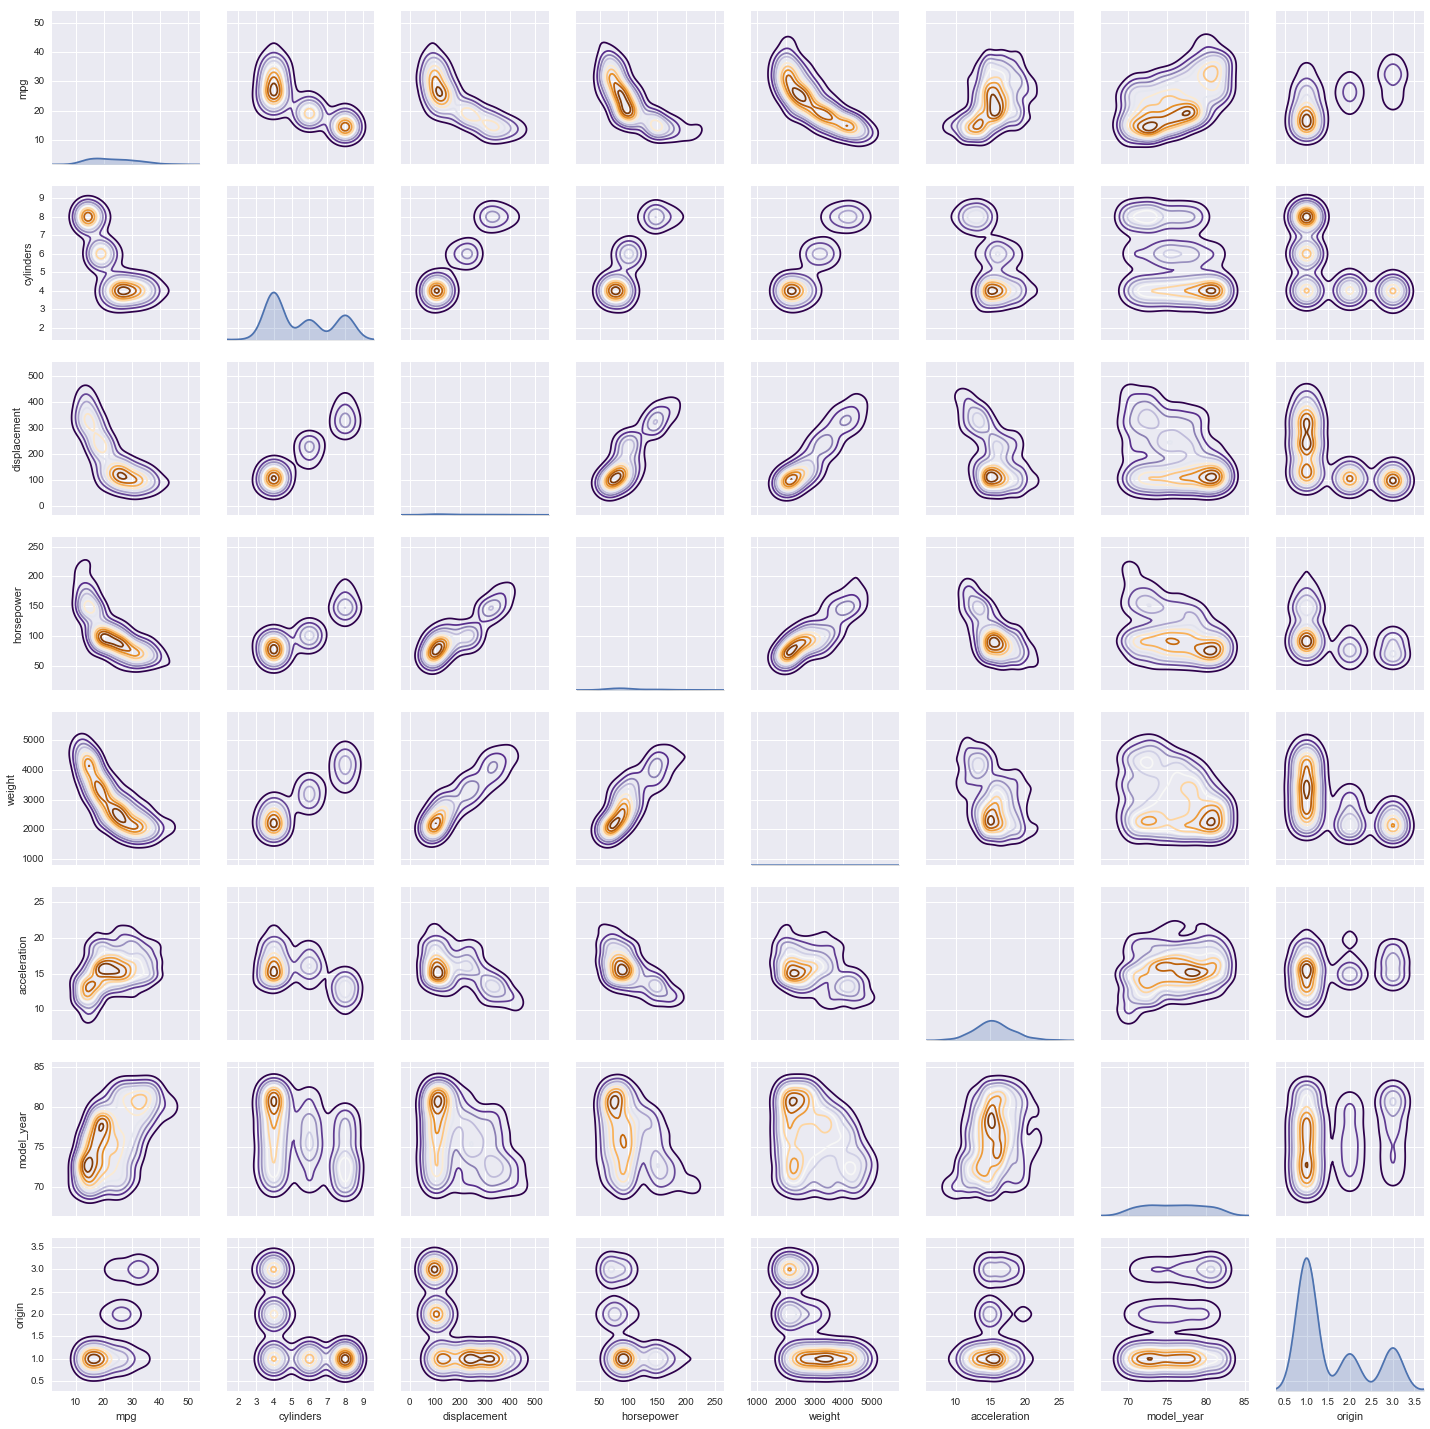

In [14]:
g = sns.PairGrid(data_clean, palette='PuOr_r')
#g.map(sns.kdeplot, cmap="PuOr_r") # If I try to do this, and then plot diag, orginal plot remains....

g = g.map_diag(sns.kdeplot, shade=True) # can't add color arg...
# To scale diag imgs, must go into indvidual scale...

g = g.map_upper(sns.kdeplot, cmap='PuOr_r')
g = g.map_lower(sns.kdeplot, cmap='PuOr_r')

plt.show()
plt.close()

#### Specific Features
However depending on the size of the data it may be costly to plot this, so you can specify the features that you wish you plot.

/Users/jarvis/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


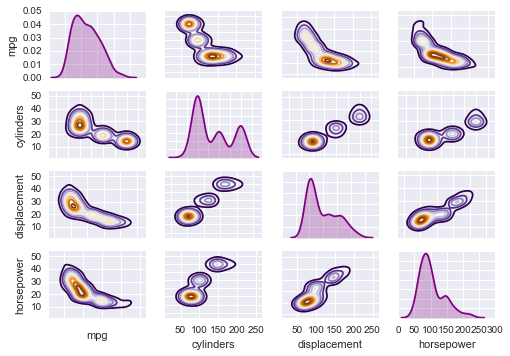

In [15]:


# Color Blindness Avoid:
# Green & Red & Brown & Blue.
# Blue & Purple.
# Light Green & Yellow.
# Blue & Grey.
# Green & Grey.
# Green & Black.
# Columns that the user wants...
columns = [0,1,2,3]


color_pal = ['purple', 'dark green', 'orange', 'grey'] # For 1-D KDE
cmap_pal = ['PuOr_r'] # For 2-D KDE
classes = [] # May not have a class for categories

column_headers =  data_clean.columns.values.tolist() # Grab headers from df
column_headers = [column_headers[x] for x in columns] # Map headers to indices selected

fig, ax = plt.subplots(len(columns), len(columns))

if not classes:
    for col1, i in enumerate(columns):
        for col2, j in enumerate(columns):

            if i == j:
                sns.kdeplot(data_clean[data_clean.columns[col1]], ax=ax[col1][col2], color=color_pal[0], shade=True, legend=False)
            else:
                sns.kdeplot( data_clean[data_clean.columns[col1]], data_clean[data_clean.columns[col2]], ax=ax[col1][col2], cmap=cmap_pal[0])

            # Formatting
            if j == 0:
                ax[i,j].set_xticklabels([])
                ax[i,j].set_ylabel(column_headers[i])
                ax[i,j].set_xlabel('')
                if i == len(columns)-1:
                    ax[i,j].set_xlabel(column_headers[j])
            elif i == len(columns)-1:
                ax[i,j].tick_params(axis='y', which='major', bottom='off')
                ax[i,j].set_yticklabels([])
                ax[i,j].set_xlabel(column_headers[j])
                ax[i,j].set_ylabel('')                
            else:
                ax[i,j].set_xticklabels([])
                ax[i,j].set_xlabel('')
                
                ax[i,j].set_yticklabels([])
                ax[i,j].set_ylabel('')
                
plt.show()
plt.close()


####  Learning Curves

Next, we plot the Learning Curves of our model.

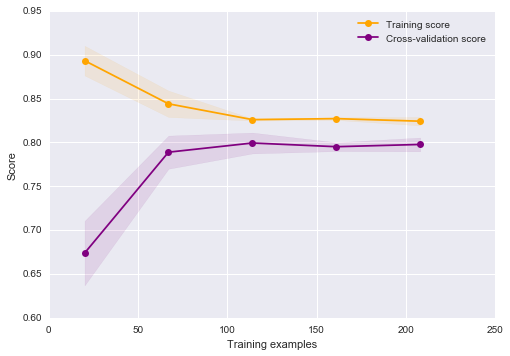

In [16]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="orange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="purple")
plt.plot(train_sizes, train_scores_mean, 'o-', color="orange",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="purple",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()
plt.close()

#### Validation Curves

Lastly, we plot the validation curves of our model.

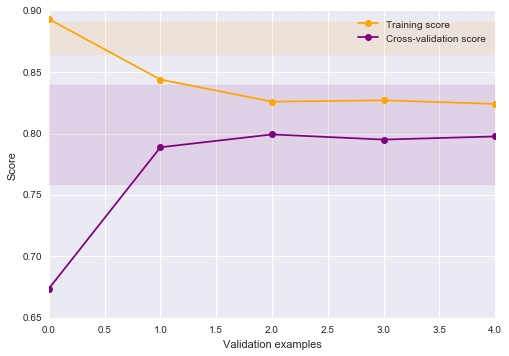

In [28]:
plt.figure()
plt.xlabel("Validation examples")
plt.ylabel("Score")

v_train_scores_mean = np.mean(v_train_scores, axis=1)
v_train_scores_std = np.std(v_train_scores, axis=1)
v_test_scores_mean = np.mean(v_test_scores, axis=1)
v_test_scores_std = np.std(v_test_scores, axis=1)

plt.fill_between(param_range, v_train_scores_mean - v_train_scores_std,
                 v_train_scores_mean + v_train_scores_std, alpha=0.1,
                 color="orange")
plt.fill_between(param_range, v_test_scores_mean - v_test_scores_std,
                 v_test_scores_mean + v_test_scores_std, alpha=0.1, color="purple")

plt.plot(param_range, train_scores_mean, 'o-', color="orange",
         label="Training score")

plt.plot(param_range, test_scores_mean, 'o-', color="purple",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()
plt.close()